# 自訂Callback顯示學習率變化

In [1]:
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import numpy as np
import pandas as pd

## 測試資料

In [8]:
# load dataset
dataframe = pd.read_csv("./data/ionosphere.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:34].astype(float)
Y = dataset[:,34]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

## 迴歸模型

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((34,)),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

## 自訂Callback

In [10]:
learning_rate_list = []
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, epoch_logs):
        learning_rate_list.append(self.model.optimizer._get_current_learning_rate().numpy())

## 設定優化器、學習率

In [11]:
# 設定學習率變化
def get_lr_metric(optimizer):
    def lr(y_true, y_pred):
        # return optimizer.learning_rate
        return optimizer._get_current_learning_rate() 
    # learning_rate_list.append(lr)
    return lr

def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    learning_rate_list.append(lrate)
    return lrate

learning_rate=1e-1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=learning_rate,
    decay_steps=10,
    decay_rate=0.9)
optimizer = Adam(lr_schedule)  
lr_metric = get_lr_metric(optimizer)

# Compile model
model.compile(loss='binary_crossentropy', optimizer=optimizer, 
    metrics=['accuracy', lr_metric])

## 模型訓練

In [12]:
history = model.fit(X, Y, epochs=50, validation_split=0.2, callbacks = [MyCallback()])

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6791 - loss: 0.6600 - lr: 0.0967 - val_accuracy: 0.9577 - val_loss: 0.1276 - val_lr: 0.0910
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8263 - loss: 0.4076 - lr: 0.0880 - val_accuracy: 0.9859 - val_loss: 0.0735 - val_lr: 0.0827
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9191 - loss: 0.1859 - lr: 0.0800 - val_accuracy: 0.9718 - val_loss: 0.1011 - val_lr: 0.0752
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9309 - loss: 0.1723 - lr: 0.0728 - val_accuracy: 0.9859 - val_loss: 0.0937 - val_lr: 0.0684
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9453 - loss: 0.1441 - lr: 0.0662 - val_accuracy: 0.9859 - val_loss: 0.0547 - val_lr: 0.0622
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9498 - loss: 0.1354 - lr: 0.0602 - val_accuracy: 0.9859 - val_loss: 0.0573 - val_lr: 0.0566
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9663 - loss

In [13]:
print(learning_rate_list)

[0.09095325, 0.08272495, 0.07524103, 0.06843417, 0.062243104, 0.05661213, 0.051490575, 0.046832357, 0.042595547, 0.03874204, 0.03523715, 0.03204933, 0.02914991, 0.026512792, 0.02411425, 0.021932695, 0.0199485, 0.018143808, 0.016502386, 0.015009457, 0.01365159, 0.012416566, 0.011293269, 0.010271597, 0.009342352, 0.008497174, 0.007728456, 0.007029281, 0.0063933604, 0.0058149695, 0.005288904, 0.004810431, 0.004375243, 0.003979426, 0.0036194175, 0.0032919776, 0.0029941616, 0.0027232869, 0.0024769187, 0.0022528379, 0.002049029, 0.001863659, 0.0016950583, 0.001541711, 0.0014022362, 0.0012753792, 0.0011599993, 0.0010550569, 0.0009596088, 0.0008727953]


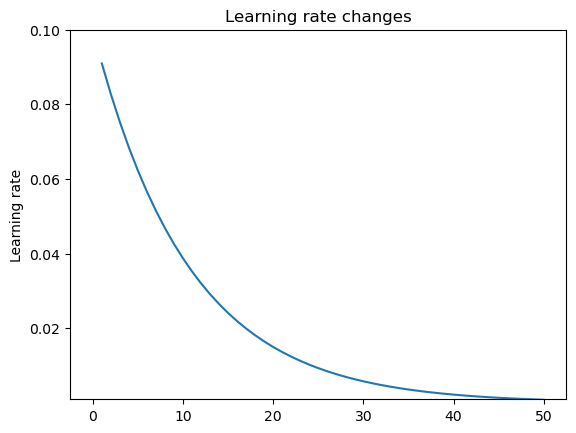

In [14]:
import matplotlib.pyplot as plt

plt.title('Learning rate changes')
plt.ylabel('Learning rate')
plt.plot(range(1, len(learning_rate_list)+1), learning_rate_list, 5)
plt.ylim(learning_rate/100., learning_rate)
plt.show()